Projeto 1

“Em quais características certo grupo de aposentados está melhor (ou pior ou
igual) do que algum outro grupo de comparação?”

-Rendimento da aposentadoria;
-Contribuição fundo privado;


#V1022 - Renda;
#V9120 - contribução do fundo privado;
#V1251 - Recebe rendimento de aposentadoria(Sim/Não)
#V4803 - Anos de estudo
#V0302 - Sexo
#V0404 - Raça


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Eduardo\Documents\ipynb


In [3]:
dados = pd.read_csv('PES2014.csv', ',')

In [4]:
dados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2014,11,15,1,1,2,19,8,1987,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,1,2014,11,15,1,2,4,19,1,1986,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2,2014,11,15,1,3,2,14,5,2013,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,3,2014,11,15,2,1,2,8,4,1963,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,4,2014,11,15,2,2,4,6,11,1970,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [5]:
V0102 = dados.iloc[:,2]

In [6]:
dados.shape


(362627, 342)

In [7]:
dados.rendageral= dados.V1022[(dados.V1022 < 500000)]
#dados.rendageral

In [8]:
n=dados.shape[0]
#dados.V1251.dropna()

In [9]:
dados.rendageral = dados.rendageral.astype('float')
dados.contr = dados.V9120.astype('float')
dados.sexo = dados.V0302.astype('float')
dados.aposentado = dados.V1251.astype('category')
dados.anos = dados.V4803.astype('float')
dados.cor_raca = dados.V0404.astype('float')


Jutificativa das escolhas/Introdução:

Renda Geral: Em termos de bem-estar, intuitivamente pensamos em renda, principalmente pelo fato de a mesma estar invariavelmente relacionada com o mesmo. Um determinado indivíduo que possui mais dinheiro tem um padrão de vida mais elevado do que outros com uma renda menor. Esta variável será utilizada para verificar se as demais estão ou não correlacionadas com o bem-estar do grupo.

Contribuição Privada: De acordo com o site da Vivo, "um dos aspectos em que a aposentadoria pública difere da previdência privada é justamente o teto: independente do salário que você receba enquanto trabalha, o máximo que o INSS vai pagar para um aposentado é R$ 4,6 mil". Dessa maneira, é de se esperar que o grupo de aposentados que optou por uma contribuição privada esteja melhor do que o outro grupo.

Sexo: Sabemos que a população brasileira está dividida praticamente de forma equivalente entre homens e mulheres. O que não sabemos, no entanto, é se homens e mulheres aposentados estejam recebendo rendimentos parecidos depois de aposentados. Este questionamento surge a partir do momento em que paramos para pensar na situação econômica e social do país algumas décadas atrás: homens trabalhando e construindo sua carreira profissional enquanto as mulheres cuidam dos afazeres domésticos. Dessa forma, é de se esperar que os homens estivessem investindo em sua aposentadoria num fundo privado enquanto as mulheres talvez não. 

Aposentados: Simplesmente serve para determinar os individuos aposentados para os fins comparativos desta análise.

Anos de estudo: É senso comum que uma pessoa com mais estudo tem mais chances de obter uma vaga de emprego melhor e, por consequência, ter melhores rendimentos salariais quando aposentados.

Cor/Raça: Historicamente no Brasil houve indiscutivelmente muita discriminação de individuos de determinadas cores e raças. Dessa maneira, pode ser que a cor ou raça de determinados grupos de aposentados tenha influenciado indiretamente seu bem-estar social e econômico.

In [10]:
#Variáveis Qualitativas

print('Frequência relativa da contribuição privada/pública:')
ut1 = (dados.contr.value_counts()/n*100).round(decimals=1).reindex(['4', '2'])
print(ut1,'\n')

print('Frequência relativa do sexo:')
ut2 = (dados.sexo.value_counts()/n*100).round(decimals=1).reindex(['4', '2'])
print(ut2,'\n')

print('Quantidade de aposentados:')
dados.aposentado.value_counts()


print('Frequência relativa dos anos de estudo:')
ut3 = (dados.anos.value_counts()/n*100).round(decimals=1).reindex(['12', '1', '9','5','16','6','4','8','7','3','10','11','2','13','15','14','17'])
print(ut2,'\n')


print('Frequência relativa Cor/Raça:')
ut10 = (dados.cor_raca.value_counts()/n*100).round(decimals=1).reindex(['8','2','4','0','6','9'])
print(ut10,'\n')

Frequência relativa da contribuição privada/pública:
4    84.0
2     2.0
Name: V9120, dtype: float64 

Frequência relativa do sexo:
4    51.5
2    48.5
Name: V0302, dtype: float64 

Quantidade de aposentados:
Frequência relativa dos anos de estudo:
4    51.5
2    48.5
Name: V0302, dtype: float64 

Frequência relativa Cor/Raça:
8    47.9
2    42.3
4     8.9
0     0.5
6     0.4
9     0.0
Name: V0404, dtype: float64 



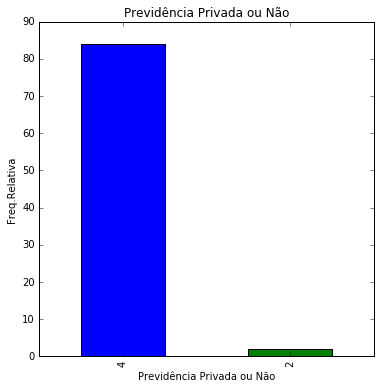

In [11]:
# Gráfico de barras
plot = ut1.plot(kind='bar',title='Previdência Privada ou Não',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa')
plt.xlabel('Previdência Privada ou Não')



Análise: Verfica-se, com este gráfico que existe uma vasta maioria de pessoas no Brasil que optaram pela previdencia pública.

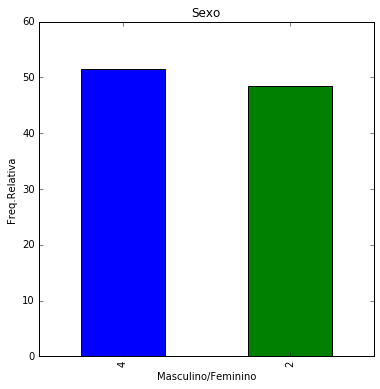

In [12]:
plot = ut2.plot(kind='bar',title='Sexo',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa')
plt.xlabel('Masculino/Feminino')



Análise: Como esperado, no Brasil existem quantidades parecidas de homens e mulheres.

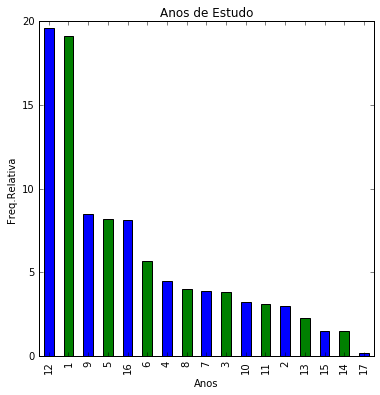

In [13]:
plot = ut3.plot(kind='bar',title='Anos de Estudo',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa')
plt.xlabel('Anos')



Legenda: 
1- Sem instrução/Menos de um ano
2- 1 ano
3- 2 anos
...
16- 15 anos ou mais
17- Não determinado

Análise: A partir do gráfico, percebe-se que ao mesmo tempo que um número significativo de indivíduos não tem instrução(ou tem menos de um ano) outra parte praticamente equivalente tem mais de dez anos de instrução. 

In [14]:
dados.rendageral = dados.rendageral[~dados.rendageral.isnull()]
#dados.rendageral.head()

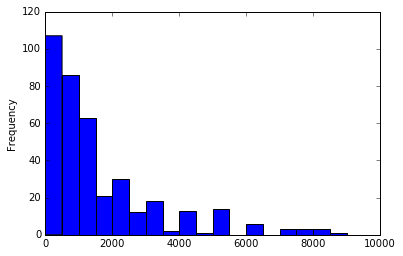

In [15]:
# Determinando faixa da renda.
dados.renda = dados.rendageral[dados.aposentado == 1]
faixarenda= np.arange(0,10000,500)
#dados.renda = pd.cut(dados.renda,faixarenda)
#dados.renda
plot= dados.rendageral.plot.hist(bins=faixarenda)


Análise: A partir do gráfico, verifica-se uma concentração de indivíduos com renda próxima de um salário mínimo.

In [16]:
#plot = dados.renda.plot.hist(bins=faixarenda)


Frequência Relativa anos de estudo dos aposentados


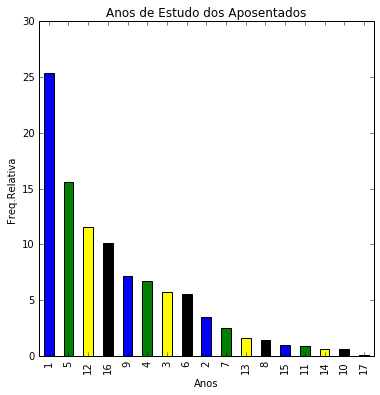

In [42]:
nap = float(dados.aposentado.value_counts()) #total de aposentados

print('Frequência Relativa anos de estudo dos aposentados')
dados.apanos = dados.anos[dados.aposentado == 1]
dados.apanos = dados.apanos.astype('float')
ut4 = (dados.apanos.value_counts()/nap*100).round(decimals=1).reindex(['1','5','12','16','9','4','3','6','2','7','13','8','15','11','14','10','17'])
#print(ut4,'\n')
      
plot = ut4.plot(kind='bar',title='Anos de Estudo dos Aposentados',figsize=(6, 6),color=('blue','green', 'yellow', 'black'))
plt.ylabel('Freq.Relativa')
plt.xlabel('Anos')

# Espaço amostral = aposentados 



Legenda: 1- Sem instrução/Menos de um ano 2- 1 ano 3- 2 anos ... 16- 15 anos ou mais 17- Não determinado

Analise: Este é o gráfico dos anos de estudo entre os aposentados. Para efeito de comparação, a seguir vou sobrepor este gráfico com o entre a população inteira.

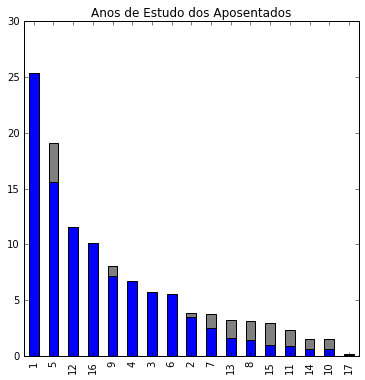

In [45]:
plot = ut3.plot(kind='bar',title='Anos de Estudo',figsize=(6, 6),color=('grey'))

plot = ut4.plot(kind='bar',title='Anos de Estudo dos Aposentados',figsize=(6, 6),color=('blue'))


Legenda: 1- Sem instrução/Menos de um ano 2- 1 ano 3- 2 anos ... 16- 15 anos ou mais 17- Não determinado

Cores: 

Azul- anos de estudo entre os aposentados;

Cinza- Anos de estudo entre a população

Analise: Evidencia-se, com este gráfico, que os aposentados concentram-se em anos de estudo inferiores às da população geral. Conseguintemente, os aposentados têm menos instrução que a população em geral. 

Frequência Relativa do Sexo nos Aposentados
4    50.8
2    49.2
Name: V0302, dtype: float64 

Análise do gráfico:


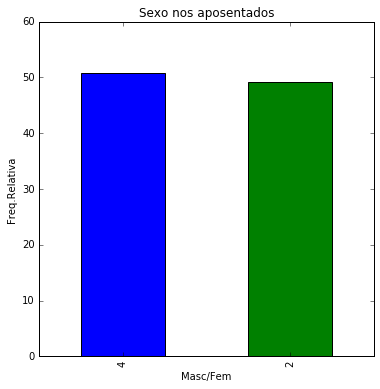

In [18]:
nap = float(dados.aposentado.value_counts()) #total de aposentados

print('Frequência Relativa do Sexo nos Aposentados')
dados.sexap = dados.sexo[dados.aposentado == 1]
dados.sexap = dados.sexap.astype('float')
ut5 = (dados.sexap.value_counts()/nap*100).round(decimals=1).reindex(['4','2'])
print(ut5,'\n')


plot = ut5.plot(kind='bar',title='Sexo nos aposentados',figsize=(6, 6),color=('blue','green', 'yellow', 'black'))
plt.ylabel('Freq.Relativa')
plt.xlabel('Masc/Fem')


print('Análise do gráfico:')


Legenda:
4- Feminino
2- Masculino

Análise: Assim como o esperado, entre os aposentados existe uma quantidade praticamente equivalente de homens e mulheres.

Frequência Relativa da contribuição privada ou não nos aposentados
4    97.4
2     2.6
Name: V9120, dtype: float64 



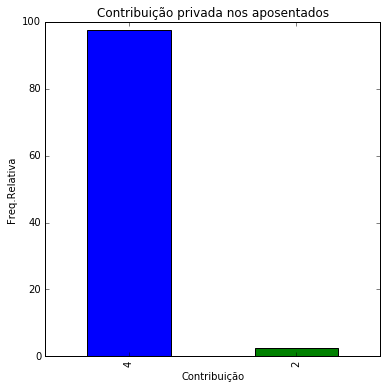

In [19]:
print('Frequência Relativa da contribuição privada ou não nos aposentados')
dados.contap = dados.contr[dados.aposentado == 1]
dados.contap = dados.contap.astype('float')
ut6 = (dados.contap.value_counts()/nap*100).round(decimals=1).reindex(['4','2'])
print(ut6,'\n')


plot = ut6.plot(kind='bar',title='Contribuição privada nos aposentados',figsize=(6, 6),color=('blue','green', 'yellow', 'black'))
plt.ylabel('Freq.Relativa')
plt.xlabel('Contribuição')


Legenda:
4- Contribuição Pública
2- Contribuição Privada

Análise: Verifica-se que entre os aposentados, a maioria dos indivíduos optou pela contribuição pública, essa porcentagem é ainda maior quando utilizamos o espaço amostral inteiro(todos a população).

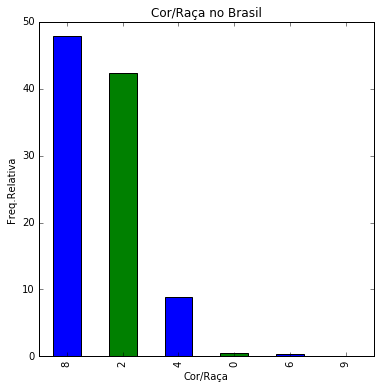

In [20]:
plot = ut10.plot(kind='bar',title='Cor/Raça no Brasil',figsize=(6, 6),color=('b','g'))
plt.ylabel('Freq.Relativa')
plt.xlabel('Cor/Raça')

Legenda:
2- Branca
4- Preta
6- Amarela
9- Parda
0- Indígena
9- Sem declaração

Análise: A partir deste gráfico percebe-se que a maior parte dos indivíduos é branca e a outra parte é, em sua maioria, de raça preta.

In [27]:
dados.sexap.value_counts()

4.0    19628
2.0    19015
Name: V0302, dtype: int64

Frequência Relativa da contribuição privada nos aposentados de sexo feminino
4    99.5
2     2.0
Name: V9120, dtype: float64 



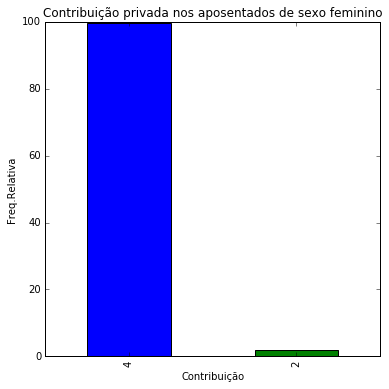

In [47]:

print('Frequência Relativa da contribuição privada nos aposentados de sexo feminino')

dados.contsex = dados.contr[(dados.aposentado == 1)&(dados.sexo == 4)]
dados.contsex = dados.contsex.astype('float')
ut11 = (dados.contsex.value_counts()/nap*200).round(decimals=1).reindex(['4','2'])
print(ut11,'\n')


plot = ut11.plot(kind='bar',title='Contribuição privada nos aposentados de sexo feminino',figsize=(6, 6),color=('blue','green', 'yellow', 'black'))
plt.ylabel('Freq.Relativa')
plt.xlabel('Contribuição')

Legenda:
4- Contribuição pública
2- Contribuição privada

Análise: A porcentagem de mulheres que optaram pela previdência pública é ainda maior do que entre os aposentados.

Frequência Relativa da contribuição privada nos aposentados de sexo feminino
4    95.4
2     3.1
Name: V9120, dtype: float64 



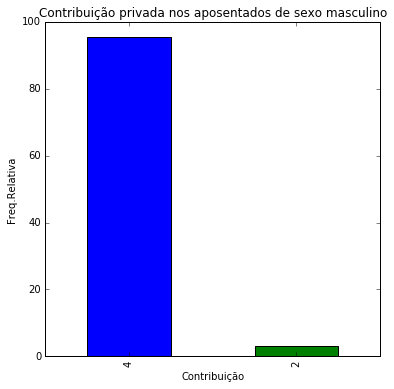

In [40]:
print('Frequência Relativa da contribuição privada nos aposentados de sexo masculino')

dados.contsex2 = dados.contr[(dados.aposentado == 1)&(dados.sexo == 2)]
dados.contsex2 = dados.contsex2.astype('float')
ut12 = (dados.contsex2.value_counts()/nap*200).round(decimals=1).reindex(['4','2'])
print(ut12,'\n')


plot = ut12.plot(kind='bar',title='Contribuição privada nos aposentados de sexo masculino',figsize=(6, 6),color=('blue','green', 'yellow', 'black'))
plt.ylabel('Freq.Relativa')
plt.xlabel('Contribuição')

Legenda:
4- Contribuição Pública
2- Contribuição Privada

Análise: A quantidade de homens aposentadas que optaram pela previdência pública é expressivamente menor do que entre as mulheres. Dessa forma, o comportamento é o esperado inicialmente.

Para efeitos de comparação, a seguir vou sobrepor os gráficos da contribuição pública/privada entre os aposentados de sexo masculino e feminino.

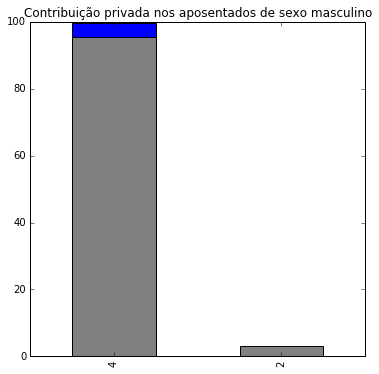

In [53]:
plot = ut11.plot(kind='bar',title='Contribuição privada nos aposentados de sexo feminino',figsize=(6, 6),color=('blue'))
plot = ut12.plot(kind='bar',title='Contribuição privada nos aposentados de sexo masculino',figsize=(6, 6),color=('grey'))


Legenda: 
4- Contribuição Pública
2- Contribuição Privada

Analise: Percebe-se, a partir da análise deste gráfico, que a contribuição privada dos homens de sexo masculino é significativamente maior.

Frequência relativa das faixas de renda entre os aposentados


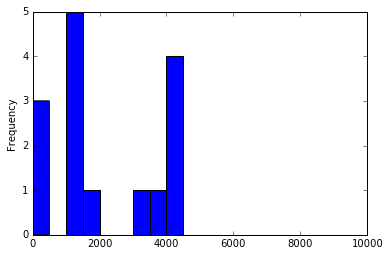

In [52]:
print('Frequência relativa das faixas de renda entre os aposentados')
dados.rendap = dados.renda[dados.aposentado == 1]
faixarenda= np.arange(0,10000,500)
plot= dados.rendap.plot.hist(bins=faixarenda)

Analise: Verifica-se que, entre os aposentados, existem três grandes grupos: os que têm renda próxima de um salário mínimo; os que recebem entre 1000 e 1500 reais, e os que recebem entre 4000 e 4500 reais. Para efeitos de comparação, a seguir vou sobrepor o gráfico da renda entre a população geral e entre os aposentados.

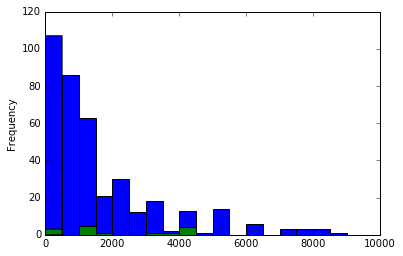

In [46]:
plot= dados.rendageral.plot.hist(bins=faixarenda)
plot= dados.rendap.plot.hist(bins=faixarenda)

Analise: Com este gráfico, evidencia-se que, apesar de os aposentados sejam uma quantidade pequena de indivíduos em comparação com a população total, a renda dos mesmos concentra-se em valores muitos mais altos do que a da população.

Frequência relativa das faixas de renda entre os aposentados de sexo feminino


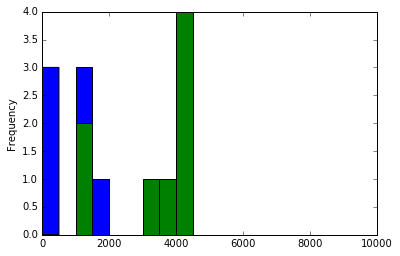

In [57]:
print('Frequência relativa das faixas de renda entre os aposentados de sexo feminino')
dados.rendapfem = dados.renda[(dados.aposentado == 1)&(dados.sexo == 4)]
faixarenda= np.arange(0,10000,500)
dados.rendapmasc = dados.renda[(dados.aposentado == 1)&(dados.sexo == 2)]
plot= dados.rendapfem.plot.hist(bins=faixarenda)
plot= dados.rendapmasc.plot.hist(bins=faixarenda)

Legenda: 

Verde- Renda dos aposentados de sexo masculino

Azul- Renda dos aposentados de sexo feminino

Análise: De acordo com este gráfico, um dos mais conclusivos até então, percebe-se que a renda dos aposentados de sexo masculino é expressivamente maior do que a renda dos aposentados de sexo feminino. Este gráfico prova ainda mais a minha hipótese inicial de que a contribuição privada e o sexo do indivíduo influenciou indiretamente o bem-estar de determinado grupo de indivíduos.

Frequência relativa da contribuição pública e renda dos aposentados


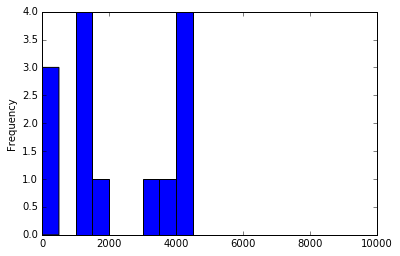

In [64]:
print('Frequência relativa da contribuição pública e renda dos aposentados')
dados.rendacontrpub = dados.renda[(dados.aposentado == 1)&(dados.contr == 4)]
faixarenda= np.arange(0,10000,500)
plot= dados.rendacontrpub.plot.hist(bins=faixarenda)

Frequência relativa da contribuição privada e renda dos aposentados


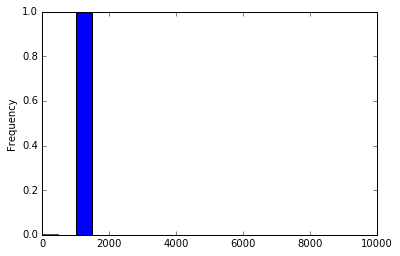

In [67]:
print('Frequência relativa da contribuição privada e renda dos aposentados')
dados.rendacontrpriv = dados.renda[(dados.aposentado == 1)&(dados.contr == 2)]
faixarenda= np.arange(0,10000,500)
plot= dados.rendacontrpriv.plot.hist(bins=faixarenda)

Análise: Comparando a renda com a contribuição privada e pública, percebe-se que a relação da contribuição pública e a privada com a renda não é linear. Dessa forma, a hipótese inicial de que o tipo de contribuição poderia influenciar o bem-estar de um determinado grupo de aposentados foi refutada.

Coeficiente angular a:  2607884204.71
Coeficiente linear b:  43839170374.9


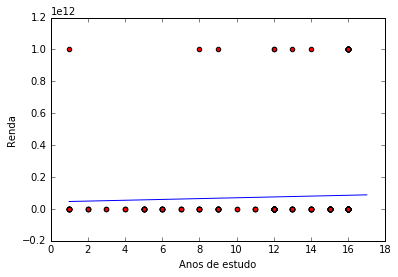

In [69]:
def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()

    dataframe.plot.scatter(x=column1, y=column2, color='red')

    import matplotlib.pyplot as plt
    plt.plot((dataframe[column1].min(), dataframe[column1].max()), (a * dataframe[column1].min() + b, a * dataframe[column1].max() + b), color='blue')
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)
    
    
scatter_and_line(dados, "V4803", "V1022" )
plt.xlabel("Anos de estudo")
plt.ylabel("Renda")

Analise: A partir deste dados, verifica-se que quanto maior os anos de estudo, maior a renda.

Frequência relativa da contribuição privada e renda dos aposentados


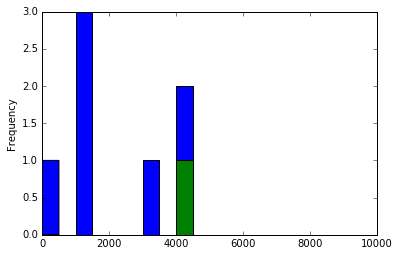

In [91]:
print('Frequência relativa da contribuição privada e renda dos aposentados')
dados.rendapb = dados.renda[(dados.aposentado == 1)&(dados.cor_raca == 2)]
faixarenda= np.arange(0,10000,500)
dados.rendapp = dados.renda[(dados.aposentado == 1)&(dados.cor_raca == 6)]
plot= dados.rendapb.plot.hist(bins=faixarenda)
plot= dados.rendapp.plot.hist(bins=faixarenda)

Analise: Este é um gráfico da renda dos brancos aposentados(em azul) e os amarelos(em verde).,A partir dos dados, verifica-se que a variável cor/raça não tem uma correlação linear com a renda e, portanto, com o bem-estar.

Conclusão: De acordo com a análise de correlações feita para cada uma das variáveis, conclui-se que "anos de estudo" e "sexo" influenciaram indiretamente durante às últimas décadas o bem-estar dos aposentados atualmente. "Cor/Raça" e "Contribuição Privada/Pública" não tiveram uma correlação linear com a renda dos aposentados. Esta análise atual do bem-estar do grupo de aposentados é interessante para evidenciar alguns importantes fatores históricos do Brasil no último século através das hipoteses iniciais. Não é possível tirar conclusões precisas a partir dos dados, pois não foram utilizadas variáveis suficientes para determinar tais correlações, no entanto, pode-se dizer que as seguintes hipoteses não foram refutadas:

-Homens aposentados têm um salário maior porque no último século investiram mais tempo na sua carreira;

-Quanto mais instrução determinado grupo de aposentados tiver, maiores as chances de os mesmos viverem com uma qualidade de vidar melhor.


Para realizar esta análise, utilizei a seguintes fontes:

http://www.vivoseudinheiro.com.br/previdencia-publica-x-privada-entenda-as-diferencas/

http://agenciabrasil.ebc.com.br/economia/noticia/2016-07/mais-de-50-dos-brasileiros-nao-fazem-qualquer-reserva-para-aposentadoria  - Esta, afirma que grande parte dos brasileiros não se preparam para a sua aposentadoria, o que é evidenciado pelo fato de que a vasta maioria opta pela previdência pública.